# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [5]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [6]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
from time import sleep

## **Scrapping Movies Data**

Since, Web Scraping sometimes can be considered illegal so sometimes it is good to know the access permissions in the form of response from the web site,

 [Response 200 means access is allowed / Response 300 means redirecting to other site / Response 400 or 404 means Blocked or Access Not Allowed]

In [7]:
# Checking Response Code:
web = requests.get('https://www.justwatch.com/in/movies?release_year_from=2000')
print(web)

<Response [200]>


In [8]:
# Specifying the URL from which movies related data will be fetched
url='https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
page = requests.get(url)

# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup = BeautifulSoup(page.text,'html.parser')

# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

#####Accessing single movie URL:

In [9]:
# Storing base URL:
base_url = 'https://www.justwatch.com'

# Selecting first occurence of movie link and getting link:
movie_url = (soup.select_one('.title-list-grid__item--link')).get('href')
# print(movie_url)

# Adding base URL to make the movie URL functional:
full_movie_url = base_url + movie_url
print(full_movie_url)

https://www.justwatch.com/in/movie/laapataa-ladies


#####Accessing Every Movie URL:

In [10]:
# Storing base URL:
base_url = 'https://www.justwatch.com'

# Fetching movies tags:
movies_tag = soup.select('.title-list-grid__item--link')

# Getting URLs from movie tags:
# <Adding (base_url) to make the fetched URLs function>
movie_urls = [f"{base_url}{i.get('href')}" for i in movies_tag]
movie_urls


['https://www.justwatch.com/in/movie/laapataa-ladies',
 'https://www.justwatch.com/in/movie/manjummel-boys',
 'https://www.justwatch.com/in/movie/aavesham-2024',
 'https://www.justwatch.com/in/movie/family-star',
 'https://www.justwatch.com/in/movie/black-magic-2024',
 'https://www.justwatch.com/in/movie/madgaon-express',
 'https://www.justwatch.com/in/movie/godzilla-x-kong-the-new-empire',
 'https://www.justwatch.com/in/movie/the-crew-2024',
 'https://www.justwatch.com/in/movie/yodha-2022',
 'https://www.justwatch.com/in/movie/article-370',
 'https://www.justwatch.com/in/movie/premalu',
 'https://www.justwatch.com/in/movie/dune-part-two',
 'https://www.justwatch.com/in/movie/kung-fu-panda-4',
 'https://www.justwatch.com/in/movie/oppenheimer',
 'https://www.justwatch.com/in/movie/monkey-man',
 'https://www.justwatch.com/in/movie/untitled-shahid-kapoor-kriti-sanon-film',
 'https://www.justwatch.com/in/movie/tillu-square',
 'https://www.justwatch.com/in/movie/hanu-man',
 'https://www.jus

## **Scrapping Movie Title**

In [11]:
# Secding request to particular movies URLs:
movie_page = requests.get(full_movie_url)

# Creating different 'soup' element for particular movies which we want to scrap:
soup2 = BeautifulSoup(movie_page.text,'html.parser')
print(soup2.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="yes" data-vue-meta="ssr" name="mobile-web-app-capable"/>
  <meta content="yes" data-vue-meta="ssr" name="apple-mobile-web-app-capable"/>
  <meta content="#182531" data-vue-meta="ssr" name="theme-color"/>
  <meta content="4eBTNBm4L6RaWdF8V51EHZajskAMgXYAg81iRXJqumQ" data-vue-meta

#####Accessing Single Movie Title:

In [12]:
# Finding class containing Movie Titles:
title = soup2.find(class_ = 'picture-comp__img')

# Printing class's alt tag: (tag containing movie title)
print(title.get('alt'))

Laapataa Ladies


#####Accessing Every Movie Title:

In [13]:
# Selecting class containing Movie Titles:
all_titles = soup.select('.picture-comp__img')

# Fetching every movie title and appending it to an empty list:
movie_titles = []
for title in all_titles:
  movie_titles.append(title.get('alt'))


In [14]:
# Printing Every Movie Title:
movie_titles

['Laapataa Ladies',
 'Manjummel Boys',
 'Aavesham',
 'Family Star',
 'Shaitaan',
 'Madgaon Express',
 'Godzilla x Kong: The New Empire',
 'Crew',
 'Yodha',
 'Article 370',
 'Premalu',
 'Dune: Part Two',
 'Kung Fu Panda 4',
 'Oppenheimer',
 'Monkey Man',
 'Teri Baaton Mein Aisa Uljha Jiya',
 'Tillu Square',
 'Hanu-Man',
 'Hereditary',
 'The Beekeeper',
 'Godzilla Minus One',
 'Anyone But You',
 'The Idea of You',
 'Dune',
 'Zara Hatke Zara Bachke',
 'Animal',
 '12th Fail',
 '777 Charlie',
 'Amar Singh Chamkila',
 'Anatomy of a Fall',
 'Madame Web',
 'Salaar',
 'Rise of the Planet of the Apes',
 'Crakk: Jeetega... Toh Jiyegaa',
 'The Raid',
 'The Fall Guy',
 'Sam Bahadur',
 '365 Days',
 'Mad Max: Fury Road',
 'Aquaman and the Lost Kingdom',
 'Challengers',
 'DJ Tillu',
 "Harry Potter and the Philosopher's Stone",
 'Romeo',
 'Bramayugam',
 'Maidaan',
 'Wild Tales',
 'Poor Things',
 'Exhuma',
 'The Goat Life',
 'Fighter',
 'Siddharth Roy',
 'Swatantra Veer Savarkar',
 'Kingdom of the Plane

## **Scrapping release Year**

In [15]:
#  Function to get the movie year on passing the URL:

def getting_movie_year(url):

  # Sending req to particular URL:
  movie_page = requests.get(url)

  # Checking the status code of URL i.e either access is possible (200) or not (429):
  status = movie_page.status_code

  # Condition to only access the URL and selecting year containing tags and class only if the status code is 200:
  if status == 200:
    soup = BeautifulSoup(movie_page.text,'html.parser')
    release_year_tag = (soup.find('span', class_ = 'text-muted')).get_text()
    pattern = re.search(r'\d{4}', release_year_tag)
    if pattern:
      match_year =  pattern.group()

    return match_year

  # Else Putting the code to 5 seconds sleep and then again executing the same task in order to avoid overloading of requests to the particular URL:
  else:
    sleep(5)
    movie_page = requests.get(url)
    soup = BeautifulSoup(movie_page.text,'html.parser')
    release_year_tag = (soup.find('span', class_ = 'text-muted')).get_text()
    pattern = re.search(r'\d{4}', release_year_tag)
    if pattern:
      match_year =  pattern.group()

    return match_year

In [16]:
a = getting_movie_year('https://www.justwatch.com/in/movie/the-ministry-of-ungentlemanly-warfare')
a

'2024'

In [18]:
# Applying function: (getting_movie_year) to each URL's from movie_urls list and appending extracted data to a new list:

movie_years = []

for years in movie_urls:
  movie_years.append(getting_movie_year(years))

In [19]:
# Printing Releasing Year of Each Movie:
movie_years

['2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2023',
 '2024',
 '2024',
 '2024',
 '2024',
 '2018',
 '2024',
 '2023',
 '2023',
 '2024',
 '2021',
 '2023',
 '2023',
 '2023',
 '2022',
 '2024',
 '2023',
 '2024',
 '2023',
 '2011',
 '2024',
 '2012',
 '2024',
 '2023',
 '2020',
 '2015',
 '2023',
 '2024',
 '2022',
 '2001',
 '2024',
 '2024',
 '2022',
 '2014',
 '2023',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2008',
 '2023',
 '2024',
 '2024',
 '2024',
 '2019',
 '2024',
 '2024',
 '2023',
 '2021',
 '2024',
 '2023',
 '2023',
 '2017',
 '2024',
 '2023',
 '2014',
 '2024',
 '2024',
 '2024',
 '2023',
 '2021',
 '2024',
 '2014',
 '2013',
 '2015',
 '2023',
 '2024',
 '2022',
 '2001',
 '2024',
 '2023',
 '2024',
 '2024',
 '2024',
 '2023',
 '2023',
 '2022',
 '2014',
 '2019',
 '2024',
 '2023',
 '2018',
 '2024',
 '2024']

## **Scrapping Genres**

In [20]:
#  Function to get the all the attributes (Director , Genre etc) of a movie on passing the URL:

def getting_attr(url):

  # Sending req to particular URL:
  movie_page = requests.get(url)

  # Checking the status code of URL i.e either accessible (200) or not (429):
  status = movie_page.status_code

  # Condition to only access the URL and finding class containing headings only if the status code is 200:
  if status == 200:
    soup = BeautifulSoup(movie_page.text,'html.parser')
    heading = soup.find_all('h3',class_='detail-infos__subheading')

    # Removing Tags and Only keeping the TEXT attributes inside a empty list: attributes
    attributes = []
    for tag in heading:
      attributes.append(tag.get_text())
      req_attr_index = int((len(attributes))/2)

    return attributes[:req_attr_index]


  # Else Putting the code to 5 seconds sleep and then again executing the same task in order to avoid overloading of requests to that particular URL:

  else:
    sleep(5)
    movie_page = requests.get(url)
    soup = BeautifulSoup(movie_page.text,'html.parser')
    heading = soup.find_all('h3',class_='detail-infos__subheading')

    # Removing Tags and Only keeping the TEXT attributes inside a empty list: attributes
    attributes = []
    for tag in heading:
      attributes.append(tag.get_text())
      req_attr_index = int((len(attributes))/2)

    return attributes[:req_attr_index]

In [21]:
# Getting All Attributes of a movie: (Testing Function)
single_movie_attrs = getting_attr('https://www.justwatch.com/in/movie/laapataa-ladies')
single_movie_attrs

[" Streaming Charts  The JustWatch Daily Streaming Charts are calculated by user activity within the last 24 hours. This includes clicking on a streaming offer, adding a title to a watchlist, and marking a title as 'seen'. This includes data from ~1.3 million movie & TV show fans per day. ",
 'Rating',
 'Genres',
 'Runtime',
 'Age rating',
 ' Production country ',
 'Director']

In [22]:
#  Function to get the all the attribute's corresponding values of a movie on passing the URL:

def getting_value(url):

  # Sending req to particular URL:
  movie_page = requests.get(url)

  # Checking the status code of URL i.e either accessible (200) or not (429):
  status = movie_page.status_code

  # Condition to only access the URL and finding class containing attribute only if the status code is 200:
  if status == 200:
    soup = BeautifulSoup(movie_page.text,'html.parser')
    heading = soup.find_all('div',class_='detail-infos__value')

    # Removing Tags and Only keeping the TEXT attributes inside a empty list: values
    values = []
    for tag in heading:
      values.append(tag.get_text())
      req_values_index = int((len(values))/2)

    return values[:req_values_index]



  # Else Putting the code to 5 seconds sleep and then again executing the same task in order to avoid overloading of requests to that particular URL:

  else:
    sleep(5)
    movie_page = requests.get(url)
    soup = BeautifulSoup(movie_page.text,'html.parser')
    heading = soup.find_all('div',class_='detail-infos__value')

    # Removing Tags and Only keeping the TEXT attributes inside a empty list: values
    values = []
    for tag in heading:
      values.append(tag.get_text())
      req_values_index = int((len(values))/2)

    return values[:req_values_index]

In [23]:
# Getting All Attribute Values of a movie: (Testing Function)
single_movie_values = getting_value('https://www.justwatch.com/in/movie/laapataa-ladies')
single_movie_values

[' 03. —',
 ' 8.5  (24k) ',
 'Comedy, Drama',
 '2h 2min',
 'UA',
 'India',
 ' Kiran Rao ']

In [24]:
# Function to get Genres of movies on passing URL:
def getting_genres(url):

  # Fetching the list of movie attributes:
  genre_attr = getting_attr(url)

  # Fetching the list of movie attributes values:
  genre_value = getting_value(url)

  # Getting Genre value of each movie:
  if 'Genres' in genre_attr:
    rating = f"{genre_value[genre_attr.index('Genres')]}"
    return rating
  # Returning NaN if Genre is not Mentioned on Movie's Web Page:
  else:
    rating = np.nan

  return rating

In [25]:
# Trial
x = getting_genres('https://www.justwatch.com/in/movie/aavesham-2024')
x

'Action & Adventure, Comedy'

In [26]:
# Storing Movies Genres in a list using getting_genres function:
movie_genres = []

for genre in movie_urls:
  movie_genres.append(getting_genres(genre))
  # print(genre,getting_genres(genre))


In [27]:
# Printing Movies Genres:
movie_genres

['Comedy, Drama',
 'Mystery & Thriller, Drama, Action & Adventure',
 'Action & Adventure, Comedy',
 'Action & Adventure, Drama, Comedy, Romance',
 'Horror, Mystery & Thriller, Drama',
 'Comedy, Drama',
 'Action & Adventure, Fantasy, Science-Fiction, Mystery & Thriller',
 'Comedy, Drama',
 'Mystery & Thriller, Drama, Action & Adventure',
 'Action & Adventure, Drama, Mystery & Thriller',
 'Comedy, Romance',
 'Science-Fiction, Drama, Action & Adventure',
 'Fantasy, Animation, Action & Adventure, Comedy, Kids & Family',
 'Drama, History',
 'Mystery & Thriller, Action & Adventure',
 'Comedy, Drama, Romance, Science-Fiction',
 'Comedy, Crime, Drama, Romance, Mystery & Thriller',
 'Science-Fiction, Fantasy, Action & Adventure, Comedy',
 'Mystery & Thriller, Horror, Drama',
 'Action & Adventure, Mystery & Thriller, Drama',
 'Science-Fiction, Action & Adventure, Drama, Horror',
 'Romance, Comedy',
 'Romance, Comedy, Drama',
 'Science-Fiction, Action & Adventure, Drama',
 'Comedy, Drama, Romance

## **Scrapping IMBD Rating**

In [28]:
# Function to get movie IMDB Ratings:
def getting_movie_rating(url):

  # Sending access request to particular URL:
  movie_page = requests.get(url)

  # Checking the status code of URL i.e either access is possible (200) or not (429):
  status = movie_page.status_code

  # Condition to only access the URL and the find regex match pattern only if the status code is 200:
  if status == 200:
    # Creating Soup Object:
    soup = BeautifulSoup(movie_page.text,'html.parser')
    # Further filtering soup object to get the required tags:
    filtered_soup_obj = soup.find_all('div',class_='detail-infos__value')

    # Creating an empty list to store movie attributes values where later regex pattern could be used to extract data:
    attributes_values = []
    for i in filtered_soup_obj:
      attributes_values.append(i.get_text())


    # Regex Pattern to find Rating values, like 8.5:
    pattern = re.compile(r'\b\d\.\d\b')

    # Iterate through the list and search for the pattern:
    for item in attributes_values:
        match = pattern.search(item)
        if match:
            # Extracting and printing the matched value found on the attributes_values list:
            extracted_value = match.group()
            break  # Exiting the loop after finding the first match
    else:
        extracted_value = np.nan

    return extracted_value



  # Else Putting the code to 5 seconds sleep and then again executing the same task in order to avoid overloading of requests to that particular URL:
  else:
    sleep(5)

    # Sending a new request and creating soup element:
    movie_page = requests.get(url)
    soup = BeautifulSoup(movie_page.text,'html.parser')

    filtered_soup_obj = soup.find_all('div',class_='detail-infos__value')

    # Creating an empty list to store movie attributes values where later regex pattern could be used to extract data:
    attributes_values = []
    for i in filtered_soup_obj:
      attributes_values.append(i.get_text())


    # Regex Pattern to find Rating values, like 8.5:
    pattern = re.compile(r'\b\d\.\d\b')

    # Iterate through the list and search for the pattern:
    for item in attributes_values:
        match = pattern.search(item)
        if match:
            # Extracting and printing the matched value found on the attributes_values list:
            extracted_value = match.group()
            break  # Exiting the loop after finding the first match
    else:
        extracted_value = np.nan
    return extracted_value


In [29]:
# Trial for single URL:
q = getting_movie_rating('https://www.justwatch.com/in/movie/anyone-but-you')
q

'6.1'

In [30]:
# Storing Movies IMDB Ratings using getting_movie_rating function:

movie_ratings = []

for i in movie_urls:
  movie_ratings.append(getting_movie_rating(i))
  # print(i,getting_movie_rating(i))

In [31]:
# Printing IMDB Ratings:
movie_ratings

['8.5',
 '8.4',
 '8.0',
 '5.1',
 '6.7',
 '7.3',
 '6.3',
 '6.4',
 '5.7',
 '8.0',
 '7.9',
 '8.6',
 '6.3',
 '8.3',
 nan,
 '6.3',
 '6.8',
 '7.9',
 '7.3',
 '6.4',
 '8.0',
 '6.1',
 '6.4',
 '8.0',
 '6.3',
 '6.2',
 '8.9',
 '8.7',
 '8.0',
 '7.7',
 '3.9',
 '6.5',
 '7.6',
 '4.9',
 '7.6',
 '7.2',
 '7.7',
 '3.3',
 '8.1',
 '5.6',
 '7.5',
 '7.2',
 '7.6',
 nan,
 '7.9',
 '8.3',
 '8.1',
 '7.9',
 '7.0',
 '8.6',
 '6.2',
 '8.2',
 '7.7',
 '7.2',
 '5.0',
 '7.6',
 '6.7',
 '5.1',
 '7.1',
 '8.2',
 '6.9',
 '6.3',
 '6.6',
 '4.2',
 '7.6',
 '5.9',
 '6.8',
 '7.4',
 '7.4',
 '6.1',
 '6.9',
 '7.4',
 '6.9',
 '6.7',
 '6.3',
 '7.0',
 '6.3',
 '5.8',
 '7.6',
 '8.2',
 '7.1',
 '6.6',
 '6.6',
 '8.3',
 '8.9',
 '5.2',
 '7.6',
 '6.2',
 '6.5',
 '9.5',
 '8.1',
 '8.0',
 '8.1',
 '8.7',
 '7.9',
 '6.3',
 '6.1',
 '8.2',
 '8.4',
 '5.8']

## **Scrapping Runtime/Duration**

In [32]:
# Function to get the movie runtime/duration from passed URL:

def getting_movie_runtime(url):

  # Sending req to particular URL:
  movie_page = requests.get(url)

  # Checking the status code of URL i.e either access is possible (200) or not (429):
  status = movie_page.status_code

  # Condition to only access the URL and the find regex match pattern only if the status code is 200:
  if status == 200:
    soup = BeautifulSoup(movie_page.text,'html.parser')
    # Defining pattern for movie runtime:
    pattern = re.compile(r'(\d+)h (\d+)min')
    # Iterating over the URL(text format) data to get the pattern's first occurence:
    match1 = pattern.search(soup.get_text())

    # Conditions on finding pattern:
    if match1:
      hours, minutes = match1.groups()
      runtime = f"{hours}h {minutes}min"
    else:
      runtime = np.nan

    return runtime



  # Else Putting the code to 5 seconds sleep and then again executing the same task in order to avoid overloading of requests to that particular URL:

  else:
    sleep(5)

    # Sending a new request and creating soup element:
    movie_page = requests.get(url)
    soup = BeautifulSoup(movie_page.text,'html.parser')
    # Defining pattern for movie runtime:
    pattern = re.compile(r'(\d+)h (\d+)min')
    # Iterating over the URL(text format) data to get the pattern's first occurence:
    match1 = pattern.search(soup.get_text())

    # Conditions on finding pattern:
    if match1:
      hours, minutes = match1.groups()
      runtime = f"{hours}h {minutes}min"
    else:
      runtime = np.nan

    return runtime


In [33]:
# Storing Movies Runtime using getting_movie_runtime function:

movies_runtime = []
for i in movie_urls:
  movies_runtime.append(getting_movie_runtime(i))
  # getting_movie_runtime(i)


In [34]:
# Printing Movies Runtime:
movies_runtime

['2h 2min',
 '2h 15min',
 '2h 38min',
 '2h 39min',
 '2h 12min',
 '2h 23min',
 '1h 55min',
 '1h 58min',
 '2h 10min',
 '2h 38min',
 '2h 36min',
 '2h 47min',
 '1h 34min',
 '3h 0min',
 '2h 1min',
 '2h 21min',
 '2h 17min',
 '2h 39min',
 '2h 7min',
 '1h 45min',
 '2h 5min',
 '1h 44min',
 '1h 56min',
 '2h 35min',
 '2h 20min',
 '3h 21min',
 '2h 27min',
 '2h 46min',
 '2h 25min',
 '2h 32min',
 '1h 56min',
 '2h 55min',
 '1h 44min',
 '2h 34min',
 '1h 41min',
 '2h 6min',
 '2h 30min',
 '1h 54min',
 '2h 1min',
 '2h 4min',
 '2h 12min',
 '2h 1min',
 '2h 32min',
 '2h 26min',
 '2h 19min',
 '3h 1min',
 '2h 2min',
 '2h 22min',
 '2h 14min',
 '2h 52min',
 '2h 47min',
 '2h 28min',
 '2h 56min',
 '2h 25min',
 '2h 44min',
 '1h 32min',
 '1h 23min',
 '2h 14min',
 '1h 33min',
 '2h 12min',
 '1h 49min',
 '2h 28min',
 '2h 4min',
 '2h 47min',
 '2h 59min',
 '2h 21min',
 '1h 57min',
 '1h 55min',
 '2h 20min',
 '2h 1min',
 '2h 18min',
 '2h 21min',
 '2h 0min',
 '1h 49min',
 '2h 5min',
 '1h 57min',
 '1h 53min',
 '2h 24min',
 

## **Scrapping Age Rating**

In [35]:
# Function to get movie Age Ratings:
def getting_movie_age_rating(url):

  # Sending access request to particular URL:
  movie_page = requests.get(url)

  # Checking the status code of URL i.e either access is possible (200) or not (429):
  status = movie_page.status_code

  # Condition to only access the URL and the find regex match pattern only if the status code is 200:
  if status == 200:
    # Creating Soup Object:
    soup = BeautifulSoup(movie_page.text,'html.parser')
    # Further filtering soup object to get the required tags:
    filtered_soup_obj = soup.find_all('div',class_='detail-infos__value')

    # Creating an empty list to store movie attributes values where later regex pattern could be used to extract data:
    attributes_values = []
    for i in filtered_soup_obj:
      attributes_values.append(i.get_text())


    # Regex Pattern to find Age-Rating values, like UA,A,U,S:
    pattern = re.compile(r'\b(U|UA|A|S)\b')

    # Iterate through the list and search for the pattern:
    for item in attributes_values:
        match = pattern.search(item)
        if match:
            # Extracting and printing the matched value found on the attributes_values list:
            extracted_value = match.group()
            break  # Exiting the loop after finding the first match
    else:
        extracted_value = np.nan

    return extracted_value



  # Else Putting the code to 5 seconds sleep and then again executing the same task in order to avoid overloading of requests to that particular URL:
  else:
    sleep(5)

    # Sending a new request and creating soup element:
    movie_page = requests.get(url)
    soup = BeautifulSoup(movie_page.text,'html.parser')

    filtered_soup_obj = soup.find_all('div',class_='detail-infos__value')

    # Creating an empty list to store movie attributes values where later regex pattern could be used to extract data:
    attributes_values = []
    for i in filtered_soup_obj:
      attributes_values.append(i.get_text())


    # Regex Pattern to find Age-Rating values, like UA,A,U,S:
    pattern = re.compile(r'\b(U|UA|A|S)\b')

    # Iterate through the list and search for the pattern:
    for item in attributes_values:
        match = pattern.search(item)
        if match:
            # Extracting and printing the matched value found on the attributes_values list:
            extracted_value = match.group()
            break  # Exiting the loop after finding the first match
    else:
        extracted_value = np.nan

    return extracted_value


In [36]:
# Trial
p = getting_movie_age_rating('https://www.justwatch.com/in/movie/siren-2024')
p

nan

In [37]:
# Storing Movies Age-Rating using getting_movie_age_rating function:

movies_age_rating = []
for i in movie_urls:
  movies_age_rating.append(getting_movie_age_rating(i))
  # print(i,getting_movie_age_rating(i))

In [38]:
# Printing Movies Age_Rating List:
movies_age_rating

['UA',
 'UA',
 nan,
 nan,
 'UA',
 'UA',
 'UA',
 'UA',
 'UA',
 nan,
 'U',
 nan,
 nan,
 'UA',
 nan,
 nan,
 nan,
 'UA',
 'A',
 nan,
 nan,
 'A',
 nan,
 'UA',
 'UA',
 'A',
 nan,
 'UA',
 nan,
 nan,
 'S',
 'A',
 nan,
 'UA',
 'A',
 'UA',
 'UA',
 nan,
 'A',
 nan,
 'A',
 'UA',
 'U',
 nan,
 'UA',
 nan,
 'A',
 'A',
 nan,
 'UA',
 'UA',
 'A',
 nan,
 nan,
 'UA',
 'U',
 'U',
 nan,
 nan,
 'UA',
 nan,
 nan,
 'A',
 'UA',
 'UA',
 'UA',
 'A',
 'UA',
 nan,
 nan,
 'A',
 'A',
 nan,
 nan,
 nan,
 'U',
 'UA',
 nan,
 nan,
 'A',
 nan,
 'A',
 'A',
 'UA',
 'U',
 'UA',
 'A',
 nan,
 nan,
 nan,
 'U',
 nan,
 'U',
 nan,
 'UA',
 'A',
 nan,
 'UA',
 nan,
 nan]

## **Fetching Production Countries Details**

In [39]:
# Trial:
single_movie_attrs = getting_attr('https://www.justwatch.com/in/movie/laapataa-ladies')
single_movie_attrs

[" Streaming Charts  The JustWatch Daily Streaming Charts are calculated by user activity within the last 24 hours. This includes clicking on a streaming offer, adding a title to a watchlist, and marking a title as 'seen'. This includes data from ~1.3 million movie & TV show fans per day. ",
 'Rating',
 'Genres',
 'Runtime',
 'Age rating',
 ' Production country ',
 'Director']

In [40]:
# Trial:
single_movie_values = getting_value('https://www.justwatch.com/in/movie/laapataa-ladies')
single_movie_values

[' 03. —',
 ' 8.5  (24k) ',
 'Comedy, Drama',
 '2h 2min',
 'UA',
 'India',
 ' Kiran Rao ']

In [41]:
# Function to get Production Country of the movies on passing URL:
def getting_production_country(url):

  # Fetching the list of movie attributes:
  production_country_attr = getting_attr(url)
  # print(len(getting_attr(url)))

  # Fetching the list of movie attributes values:
  production_country_value = getting_value(url)
  # print(len(getting_value(url)))

  # Getting Production Country of each movie:
  if ' Production country ' in production_country_attr:
    rating = f"{production_country_value[production_country_attr.index(' Production country ')]}"
    return rating
  # Returning NaN if Production Country is not Mentioned on Movie's Web Page:
  else:
    rating = np.nan

  return rating

In [42]:
# Trial:
z = getting_production_country('https://www.justwatch.com/in/movie/article-370')
z

'India'

In [43]:
# Storing Movies Production Country using getting_production_country function:

movies_production_country = []

for i in movie_urls:
  movies_production_country.append(getting_production_country(i))
  # print(i,getting_production_country(i))

In [44]:
# Printing Movies Production Country List:
movies_production_country

['India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'United States, Australia',
 'India',
 'United States, India',
 'India',
 'India',
 'United States',
 'United States',
 'United States, United Kingdom',
 'Canada, Singapore, United States',
 'India',
 'India',
 'India',
 'United States',
 'United Kingdom, United States',
 'Japan',
 'United States',
 'United States',
 'United States',
 'India',
 'India',
 'India',
 'India',
 'India',
 'France',
 'United States',
 'India',
 'United Kingdom, United States',
 'India',
 'United States, France, Indonesia',
 'United States, Australia, Canada',
 'India',
 'Poland',
 'United States, Australia',
 'United States',
 'Italy, United States',
 'India',
 'United Kingdom, United States',
 nan,
 'India',
 'India',
 'Argentina, Spain',
 'Ireland, United Kingdom, United States',
 'South Korea',
 'India, United States',
 'India',
 'India',
 'India',
 'United States',
 'India',
 'United States',
 'United States',
 'India',
 'United Arab Emirates, 

## **Fetching Streaming Service Details**

In [45]:
def getting_streaming_platforms(url):

   movie_page = requests.get(url)

   status = movie_page.status_code

   if status == 200:
      soup = BeautifulSoup(movie_page.text,'html.parser')

      streaming_obj = soup.find_all('img' , class_= 'offer__icon')

      all_platforms = []
      for platform in streaming_obj:
        all_platforms.append(platform.get('alt'))

      # Removing Repeating Elements:
      unique_platforms = set(all_platforms)
      platforms = list(unique_platforms)
      values = " , ".join(platforms)

      if len(platforms) == 0:
        values = np.nan

      return values

   else:
      sleep(5)

      movie_page = requests.get(url)
      soup = BeautifulSoup(movie_page.text,'html.parser')

      streaming_obj = soup.find_all('img' , class_= 'offer__icon')

      all_platforms = []
      for platform in streaming_obj:
        all_platforms.append(platform.get('alt'))

      # Removing Repeating Elements:
      unique_platforms = set(all_platforms)
      platforms = list(unique_platforms)
      values = " , ".join(platforms)

      if len(platforms) == 0:
        values = np.nan

      return values



In [46]:
x = getting_streaming_platforms('https://www.justwatch.com/in/movie/laapataa-ladies')
x

'Bookmyshow , Netflix'

In [47]:
movie_platforms = []

for platform in movie_urls:
  movie_platforms.append(getting_streaming_platforms(platform))
  # print(platform,getting_streaming_platforms(platform))

In [48]:
# Printing Movies Streaming Platforms List:
movie_platforms

['Bookmyshow , Netflix',
 'Bookmyshow , Hotstar',
 'Bookmyshow , Amazon Video , Amazon Prime Video',
 'Amazon Video , Amazon Prime Video',
 'Netflix',
 'Amazon Video , Amazon Prime Video',
 'Google Play Movies , Amazon Video , Apple TV , Bookmyshow , YouTube',
 'Bookmyshow , Netflix',
 'Amazon Video , Amazon Prime Video',
 'Netflix',
 'Hotstar , aha',
 'Google Play Movies , Apple TV , Bookmyshow , YouTube',
 'Apple TV , Bookmyshow , Amazon Video , Zee5',
 'Google Play Movies , YouTube , Jio Cinema , Hungama Play , Apple TV , Zee5 , Amazon Video',
 nan,
 'Amazon Video , Amazon Prime Video',
 'Netflix',
 'Jio Cinema , Hotstar , Zee5',
 'VI movies and tv , MUBI , Amazon Prime Video',
 'Lionsgate Play , Lionsgate Play Amazon Channel , Lionsgate Play Apple TV Channel',
 nan,
 'Google Play Movies , YouTube , Netflix , Apple TV , Zee5 , Amazon Video',
 'Amazon Prime Video',
 'Google Play Movies , Amazon Video , Netflix , Apple TV , YouTube',
 'Jio Cinema',
 'Bookmyshow , Netflix',
 'Bookmysho

## **Now Creating Movies DataFrame**

In [49]:
# Creating a dictionary from movies attributes list:
movies_data = {
    'Movies Titles': movie_titles,
    'Movies Years': movie_years,
    'Movies Genre': movie_genres,
    'Movies IMDB Rating': movie_ratings,
    'Movies Runtime': movies_runtime,
    'Movies Age-Rating': movies_age_rating,
    'Movies Production Country': movies_production_country,
    'Movies Streaming Platforms' : movie_platforms
}
# Creating Index:
index = [i for i in range(1,101)]

# Creating the DataFrame
movies_df = pd.DataFrame(movies_data)
movies_df.index = index

# Display the DataFrame
movies_df.head(50)

Movies Titles Movies Years  \
1                            Laapataa Ladies         2024   
2                             Manjummel Boys         2024   
3                                   Aavesham         2024   
4                                Family Star         2024   
5                                   Shaitaan         2024   
6                            Madgaon Express         2024   
7            Godzilla x Kong: The New Empire         2024   
8                                       Crew         2024   
9                                      Yodha         2024   
10                               Article 370         2024   
11                                   Premalu         2024   
12                            Dune: Part Two         2024   
13                           Kung Fu Panda 4         2024   
14                               Oppenheimer         2023   
15                                Monkey Man         2024   
16          Teri Baaton Mein Aisa Uljha Jiya         2024   
17                              Tillu Square         2024   
18                                  Hanu-Man         2024   
19                                Hereditary         2018   
20                             The Beekeeper         2024   
21                        Godzilla Minus One         2023   
22                            Anyone But You         2023   
23                           The Idea of You         2024   
24                                      Dune         2021   
25                    Zara Hatke Zara Bachke         2023   
26                                    Animal         2023   
27                                 12th Fail         2023   
28                               777 Charlie         2022   
29                       Amar Singh Chamkila         2024   
30                         Anatomy of a Fall         2023   
31                                Madame Web         2024   
32                                    Salaar         2023   
33            Rise of the Planet of the Apes         2011   
34             Crakk: Jeetega... Toh Jiyegaa         2024   
35                                  The Raid         2012   
36                              The Fall Guy         2024   
37                               Sam Bahadur         2023   
38                                  365 Days         2020   
39                        Mad Max: Fury Road         2015   
40              Aquaman and the Lost Kingdom         2023   
41                               Challengers         2024   
42                                  DJ Tillu         2022   
43  Harry Potter and the Philosopher's Stone         2001   
44                                     Romeo         2024   
45                                Bramayugam         2024   
46                                   Maidaan         2022   
47                                Wild Tales         2014   
48                               Poor Things         2023   
49                                    Exhuma         2024   
50                             The Goat Life         2024   

                                         Movies Genre Movies IMDB Rating  \
1                                       Comedy, Drama                8.5   
2       Mystery & Thriller, Drama, Action & Adventure                8.4   
3                          Action & Adventure, Comedy                8.0   
4          Action & Adventure, Drama, Comedy, Romance                5.1   
5                   Horror, Mystery & Thriller, Drama                6.7   
6                                       Comedy, Drama                7.3   
7   Action & Adventure, Fantasy, Science-Fiction, ...                6.3   
8                                       Comedy, Drama                6.4   
9       Mystery & Thriller, Drama, Action & Adventure                5.7   
10      Action & Adventure, Drama, Mystery & Thriller                8.0   
11                                    Comedy, Romance                7.9   
12     

## **Scraping TV  Show Data**

In [50]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
page=requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

Since, Web Scraping sometimes can be considered illegal so sometimes it is good to know the access permissions in the form of response from the web site,

 [Response 200 means access is allowed / Response 300 means redirecting to other site / Response 400 or 404 means Blocked or Access Not Allowed]

In [51]:
# Checking Response Code:
web = requests.get('https://www.justwatch.com/in/tv-shows?release_year_from=2000')
print(web)

<Response [429]>


## **Fetching Tv shows Url details**

In [52]:
def get_tv_show_urls(base_url):
    # Send a request to the provided URL
    response = requests.get(base_url)

    if response.status_code == 200:
        # Parse the HTML content
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract all TV show links
        tv_show_links = soup.select('.title-list-grid__item--link')

        # List to store full TV show URLs
        tv_show_urls = []

        # Iterate through each link and construct the full URL
        for link in tv_show_links:
            href = link.get('href')
            if href:
                full_url = 'https://www.justwatch.com' + href
                tv_show_urls.append(full_url)

        return tv_show_urls
    else:
        print(f"Failed to access {base_url}, status code: {response.status_code}")
        return []

# Example usage
base_url = 'https://www.justwatch.com/in/tv-shows?release_year_from=2000'
tv_show_urls = get_tv_show_urls(base_url)

# Print the TV show URLs
for url in tv_show_urls:
    print(url)


Failed to access https://www.justwatch.com/in/tv-shows?release_year_from=2000, status code: 429


In [53]:
# Example usage
base_url = 'https://www.justwatch.com/in/tv-shows?release_year_from=2000'
tv_show_urls = get_tv_show_urls(base_url)

# Print the TV show URLs
for url in tv_show_urls:
    print(url)

Failed to access https://www.justwatch.com/in/tv-shows?release_year_from=2000, status code: 429


Accessing Single TV Show URL

In [54]:
# Storing base URL:
base_url = 'https://www.justwatch.com'

# Selecting first occurence of TV show link and getting link:
tv_show_url = (soup.select_one('.title-list-grid__item--link')).get('href')

# print(movie_url)

# Adding base URL to make the TV Show URL functional:
full_tv_show_url = base_url + tv_show_url
print(full_tv_show_url)

https://www.justwatch.com/in/tv-show/heeramandi


Accessing Every TV Show's  URL

In [55]:
# Storing base URL:
base_url = 'https://www.justwatch.com'

# Fetching movies tags:
tv_show_url = soup.select('.title-list-grid__item--link')

# Getting URLs from TV Show tags:
# <Adding (base_url) to make the fetched URL function>
tv_show_urls = [f"{base_url}{i.get('href')}" for i in tv_show_url]
tv_show_urls


['https://www.justwatch.com/in/tv-show/heeramandi',
 'https://www.justwatch.com/in/tv-show/panchayat',
 'https://www.justwatch.com/in/tv-show/shogun-2024',
 'https://www.justwatch.com/in/tv-show/mirzapur',
 'https://www.justwatch.com/in/tv-show/fallout',
 'https://www.justwatch.com/in/tv-show/game-of-thrones',
 'https://www.justwatch.com/in/tv-show/dead-boy-detectives',
 'https://www.justwatch.com/in/tv-show/murder-in-mahim',
 'https://www.justwatch.com/in/tv-show/3-body-problem',
 'https://www.justwatch.com/in/tv-show/young-sheldon',
 'https://www.justwatch.com/in/tv-show/apharan',
 'https://www.justwatch.com/in/tv-show/baby-reindeer',
 'https://www.justwatch.com/in/tv-show/attack-on-titan',
 'https://www.justwatch.com/in/tv-show/bridgerton',
 'https://www.justwatch.com/in/tv-show/sunflower-2021',
 'https://www.justwatch.com/in/tv-show/maxton-hall-the-world-between-us',
 'https://www.justwatch.com/in/tv-show/aashram',
 'https://www.justwatch.com/in/tv-show/dil-dosti-dilemma',
 'https:

## **Fetching Tv Show Title details**

In [56]:
# Secding request to particular TV show URLs:
tv_show_page = requests.get(full_tv_show_url)

# Creating different 'soup' element for particular TV show which we want to scrap:
soup2 = BeautifulSoup(tv_show_page.text,'html.parser')
print(soup2.prettify())

Too Many Requests



In [57]:
# Selecting class containing TV show Titles:
all_tv_titles = soup.select('.picture-comp__img')

# Fetching every TV show title and appending it to an empty list:
tv_show_titles = []
for title in all_tv_titles:
  tv_show_titles.append(title.get('alt'))


In [58]:
tv_show_titles

['Heeramandi: The Diamond Bazaar',
 'Panchayat',
 'Shōgun',
 'Mirzapur',
 'Fallout',
 'Game of Thrones',
 'Dead Boy Detectives',
 'Murder in Mahim',
 '3 Body Problem',
 'Young Sheldon',
 'Apharan',
 'Baby Reindeer',
 'Attack on Titan',
 'Bridgerton',
 'Sunflower',
 'Maxton Hall: The World Between Us',
 'Aashram',
 'Dil Dosti Dilemma',
 'Thank You, Next',
 'Ranneeti: Balakot & Beyond',
 'Farzi',
 'Dark Matter',
 'The 8 Show',
 'Lucifer',
 'A Gentleman in Moscow',
 'The Great Indian Kapil Show',
 'Demon Slayer: Kimetsu no Yaiba',
 'The Family Man',
 'Mastram',
 'Gullak',
 'Inspector Rishi',
 'Gandii Baat',
 'Jujutsu Kaisen',
 'House of the Dragon',
 'Asur: Welcome to Your Dark Side',
 'Queen of Tears',
 'The Rookie',
 'Undekhi',
 'Goodbye Earth',
 'The Good Doctor',
 'Solo Leveling',
 'The Gentlemen',
 'The Last of Us',
 'Peaky Blinders',
 'Broken But Beautiful',
 'Stranger Things',
 'Modern Family',
 'House',
 'Reacher',
 'True Detective',
 'Money Heist',
 'College Romance',
 'Naruto Sh

## **Fetching Release Year**

In [59]:
# Write Your Code here
#  Function to get the TV show's year on passing the URL:

def getting_tv_show_year(url):

  # Sending req to particular URL:
  tv_show_page = requests.get(url)

  # Checking the status code of URL i.e either access is possible (200) or not (429):
  status = tv_show_page.status_code

  # Condition to only access the URL and selecting year containing tags and class only if the status code is 200:
  if status == 200:
    soup = BeautifulSoup(tv_show_page.text,'html.parser')

    # Selecting more specific tags containing TV show Years:
    release_year_tag = soup.find('span', class_='text-muted').get_text()
    pattern = re.search(r'\d{4}', release_year_tag)

    if pattern:
      return pattern.group()
    else:
      return np.nan

  # Else Putting the code to 5 seconds sleep and then again executing the same task in order to avoid overloading of requests to the particular URL:
  else:
    sleep(5)
    tv_show_page = requests.get(url)
    soup = BeautifulSoup(tv_show_page.text,'html.parser')

    # Selecting more specific tags containing TV show Years:
    release_year_tag = soup.find('span', class_='text-muted').get_text()
    pattern = re.search(r'\d{4}', release_year_tag)

    if pattern:
      return pattern.group()
    else:
      return np.nan

In [60]:
# Trial
a = getting_tv_show_year('https://www.justwatch.com/in/tv-show/gandii-baat')
a

'2018'

In [61]:
# Applying function: (getting_movie_year) to each URL's from movie_urls list and appending extracted data to a new list:

tv_show_years = []

for years in tv_show_urls:
  # print(years,getting_tv_show_year(years))
  tv_show_years.append(getting_tv_show_year(years))

In [62]:
# Printing TV Shows Releasing Years:
tv_show_years

['2024',
 '2020',
 '2024',
 '2018',
 '2024',
 '2011',
 '2024',
 '2024',
 '2024',
 '2017',
 '2018',
 '2024',
 '2013',
 '2020',
 '2021',
 '2024',
 '2020',
 '2024',
 '2024',
 '2024',
 '2023',
 '2024',
 '2024',
 '2016',
 '2024',
 '2024',
 '2019',
 '2019',
 '2020',
 '2019',
 '2024',
 '2018',
 '2020',
 '2022',
 '2020',
 '2024',
 '2018',
 '2020',
 '2024',
 '2017',
 '2024',
 '2024',
 '2023',
 '2013',
 '2018',
 '2016',
 '2009',
 '2004',
 '2022',
 '2014',
 '2017',
 '2018',
 '2007',
 '2002',
 '2019',
 '2024',
 '2024',
 '2024',
 '2010',
 '2023',
 '2020',
 '2008',
 '2005',
 '2024',
 '2021',
 '2024',
 '2020',
 '2024',
 '2008',
 '2005',
 '2024',
 '2022',
 '2019',
 '2015',
 '2005',
 '2018',
 '2020',
 '2021',
 '2021',
 '2024',
 '2016',
 '2023',
 '2024',
 '2014',
 '2021',
 '2022',
 '2018',
 '2024',
 '2017',
 '2021',
 '2018',
 '2022',
 '2006',
 '2017',
 '2013',
 '2018',
 '2015',
 '2009',
 '2024',
 '2024']

## **Fetching TV Show Genre Details**

In [63]:
# Write Your Code here
#  Function to get the all the attributes (Director , Genre etc) of a TV show on passing the URL:

def getting_tv_show_attr(url):

  # Sending req to particular URL:
  tv_show_page = requests.get(url)

  # Checking the status code of URL i.e either accessible (200) or not (429):
  status = tv_show_page.status_code

  # Condition to only access the URL and finding class containing headings only if the status code is 200:
  if status == 200:
    soup = BeautifulSoup(tv_show_page.text,'html.parser')
    heading = soup.find_all('h3',class_='detail-infos__subheading')

    # Removing Tags and Only keeping the TEXT attributes inside a empty list: tv_show_attributes
    tv_show_attributes = []
    for tag in heading:
      tv_show_attributes.append(tag.get_text())
      req_attr_index = int((len(tv_show_attributes))/2)

    return tv_show_attributes[:req_attr_index]


  # Else Putting the code to 5 seconds sleep and then again executing the same task in order to avoid overloading of requests to that particular URL:

  else:
    sleep(5)
    tv_show_page = requests.get(url)
    soup = BeautifulSoup(tv_show_page.text,'html.parser')
    heading = soup.find_all('h3',class_='detail-infos__subheading')

    # Removing Tags and Only keeping the TEXT attributes inside a empty list: tv_show_attributes
    tv_show_attributes = []
    for tag in heading:
      tv_show_attributes.append(tag.get_text())
      req_attr_index = int((len(tv_show_attributes))/2)

    return tv_show_attributes[:req_attr_index]


In [64]:
# Trial
p = getting_tv_show_attr('https://www.justwatch.com/in/tv-show/murder-in-mahim')
p

[" Streaming Charts  The JustWatch Daily Streaming Charts are calculated by user activity within the last 24 hours. This includes clicking on a streaming offer, adding a title to a watchlist, and marking a title as 'seen'. This includes data from ~1.3 million movie & TV show fans per day. ",
 'Rating',
 'Genres',
 'Runtime',
 ' Production country ']

In [65]:
# Write Your Code here
#  Function to get the all the attributes (Director , Genre etc) of a TV show on passing the URL:

def getting_tv_show_value(url):

  # Sending req to particular URL:
  tv_show_page = requests.get(url)

  # Checking the status code of URL i.e either accessible (200) or not (429):
  status = tv_show_page.status_code

  # Condition to only access the URL and finding class containing headings only if the status code is 200:
  if status == 200:
    soup = BeautifulSoup(tv_show_page.text,'html.parser')
    heading = soup.find_all('div',class_='detail-infos__value')

    # Removing Tags and Only keeping the TEXT attributes inside a empty list: tv_show_attributes
    tv_show_values = []
    for tag in heading:
      tv_show_values.append(tag.get_text())
      req_attr_index = int((len(tv_show_values))/2)

    return tv_show_values[:req_attr_index]


  # Else Putting the code to 5 seconds sleep and then again executing the same task in order to avoid overloading of requests to that particular URL:

  else:
    sleep(5)
    tv_show_page = requests.get(url)
    soup = BeautifulSoup(tv_show_page.text,'html.parser')
    heading = soup.find_all('div',class_='detail-infos__value')

    # Removing Tags and Only keeping the TEXT attributes inside a empty list: tv_show_attributes
    tv_show_values = []
    for tag in heading:
      tv_show_values.append(tag.get_text())
      req_attr_index = int((len(tv_show_values))/2)

    return tv_show_values[:req_attr_index]

In [66]:
q = getting_tv_show_value('https://www.justwatch.com/in/tv-show/murder-in-mahim')
q

[' 04. +4', ' 7.6  (5k) ', '', '42min', 'India']

In [67]:
# Function to get Genres of TV Shows on passing URL:
def getting_tv_show_genres(url):

  # Fetching the list of movie attributes:
  genre_attr = getting_tv_show_attr(url)

  # Fetching the list of movie attributes values:
  genre_value = getting_tv_show_value(url)

  # Getting Genre value of each movie:
  if 'Genres' in genre_attr:
    genre = f"{genre_value[genre_attr.index('Genres')]}"
    if len(genre) == 0:
      genre = np.nan

    return genre


  # Returning NaN if Genre is not Mentioned on Movie's Web Page:
  else:
    genre = np.nan


  return genre

In [68]:
r = getting_tv_show_genres('https://www.justwatch.com/in/tv-show/murder-in-mahim')
r

nan

In [69]:
# Storing TV Show Genres in a list using getting_tv_show_genres function:
tv_show_genres = []

for genre in tv_show_urls:
  tv_show_genres.append(getting_tv_show_genres(genre))
  # print(genre,getting_tv_show_genres(genre))


In [70]:
# Printing TV shows Genres:
tv_show_genres

['Drama, History, Romance, War & Military',
 'Comedy, Drama',
 'War & Military, Drama, History',
 'Crime, Action & Adventure, Drama, Mystery & Thriller',
 'Drama, Science-Fiction, War & Military, Action & Adventure, Mystery & Thriller',
 'Action & Adventure, Drama, Fantasy, Science-Fiction',
 'Action & Adventure, Comedy, Crime, Drama, Fantasy, Horror, Mystery & Thriller, Science-Fiction',
 nan,
 'Drama, Science-Fiction, Mystery & Thriller, Fantasy',
 'Comedy',
 'Drama, Crime, Mystery & Thriller, Action & Adventure',
 'Drama, Comedy',
 'Fantasy, Horror, Animation, Action & Adventure, Drama, Science-Fiction',
 'Drama, Romance',
 'Comedy, Crime',
 'Romance, Drama',
 'Drama, Crime, Mystery & Thriller',
 'Drama, Comedy',
 'Romance, Comedy, Drama',
 'Action & Adventure, War & Military',
 'Crime, Drama, Mystery & Thriller',
 'Drama, Science-Fiction, Mystery & Thriller',
 'Drama, Mystery & Thriller, Comedy',
 'Crime, Science-Fiction, Drama, Fantasy',
 'Drama, Mystery & Thriller, History',
 'Co

## **Fetching IMDB Rating Details**

In [71]:
# Function to get TV show IMDB Ratings:
def getting_tv_show_rating(url):

  # Sending access request to particular URL:
  tv_show_page = requests.get(url)

  # Checking the status code of URL i.e either access is possible (200) or not (429):
  status = tv_show_page.status_code

  # Condition to only access the URL and the find regex match pattern only if the status code is 200:
  if status == 200:
    # Creating Soup Object:
    soup = BeautifulSoup(tv_show_page.text,'html.parser')
    # Further filtering soup object to get the required tags:
    filtered_soup_obj = soup.find_all('div',class_='detail-infos__value')

    # Creating an empty list to store TV show's attributes values where later regex pattern could be used to extract data:
    attributes_values = []
    for i in filtered_soup_obj:
      attributes_values.append(i.get_text())


    # Regex Pattern to find Rating values, like 8.5:
    pattern = re.compile(r'\b\d+\.\d+\b')

    # Iterate through the list and search for the pattern:
    for item in attributes_values:
        match = pattern.search(item)
        if match:
            # Extracting and printing the matched value found on the attributes_values list:
            extracted_value = match.group()
            break  # Exiting the loop after finding the first match
    else:
        extracted_value = np.nan

    return extracted_value



  # Else Putting the code to 5 seconds sleep and then again executing the same task in order to avoid overloading of requests to that particular URL:
  else:
    sleep(5)

    # Sending a new request and creating soup element:
    tv_show_page = requests.get(url)
    soup = BeautifulSoup(tv_show_page.text,'html.parser')
    # Further filtering soup object to get the required tags:
    filtered_soup_obj = soup.find_all('div',class_='detail-infos__value')

    # Creating an empty list to store TV show's attributes values where later regex pattern could be used to extract data:
    attributes_values = []
    for i in filtered_soup_obj:
      attributes_values.append(i.get_text())


    # Regex Pattern to find Rating values, like 8.5:
    pattern = re.compile(r'\b\d+\.\d+\b')

    # Iterate through the list and search for the pattern:
    for item in attributes_values:
        match = pattern.search(item)
        if match:
            # Extracting and printing the matched value found on the attributes_values list:
            extracted_value = match.group()
            break  # Exiting the loop after finding the first match
    else:
        extracted_value = np.nan

    return extracted_value


In [72]:
h = getting_tv_show_rating('https://www.justwatch.com/in/tv-show/attack-on-titan')
h

'9.0'

In [73]:
# Storing TV Show IMDB Ratings in a list using getting_tv_show_rating function:
tv_show_ratings = []

for rating in tv_show_urls:
  tv_show_ratings.append(getting_tv_show_rating(rating))
  # print(rating,getting_tv_show_rating(rating))


In [74]:
# Printing TV shows ratings:
tv_show_ratings

['6.5',
 '8.9',
 '8.7',
 '8.5',
 '8.5',
 '9.2',
 '7.6',
 '7.6',
 '7.5',
 '7.7',
 '8.3',
 '7.9',
 '9.0',
 '7.4',
 '7.4',
 '7.7',
 '7.4',
 '6.5',
 '5.6',
 '7.8',
 '8.4',
 '7.4',
 '7.2',
 '8.1',
 '7.1',
 '6.6',
 '8.7',
 '8.7',
 '7.1',
 '9.1',
 '7.2',
 '3.4',
 '8.6',
 '8.4',
 '8.5',
 nan,
 '8.0',
 nan,
 '4.3',
 '8.0',
 '8.3',
 '8.1',
 '8.7',
 '8.8',
 '8.6',
 '8.7',
 '8.5',
 '8.7',
 '8.1',
 '8.9',
 '8.2',
 '8.3',
 '8.7',
 '8.4',
 '8.3',
 '8.2',
 '6.2',
 '7.2',
 '8.1',
 '7.2',
 '6.5',
 '3.8',
 '8.3',
 '8.1',
 '7.9',
 '7.4',
 '9.3',
 '9.0',
 '9.5',
 '7.6',
 '7.0',
 '7.1',
 '8.7',
 '8.7',
 '8.6',
 '8.7',
 '8.1',
 '7.5',
 '7.5',
 '5.6',
 '7.8',
 '8.5',
 '6.3',
 '7.5',
 '8.2',
 '7.6',
 '7.9',
 '7.6',
 '8.2',
 '8.7',
 '5.5',
 '8.1',
 '8.9',
 '8.7',
 '6.5',
 '7.7',
 '9.0',
 '8.2',
 '8.3',
 '7.0']

## **Fetching Age Rating Details**

In [75]:
# Function to get TV show's Age-Ratings:
def getting_tv_show_age_rating(url):

  # Sending access request to particular URL:
  tv_show_page = requests.get(url)

  # Checking the status code of URL i.e either access is possible (200) or not (429):
  status = tv_show_page.status_code

  # Condition to only access the URL and the find regex match pattern only if the status code is 200:
  if status == 200:
    # Creating Soup Object:
    soup = BeautifulSoup(tv_show_page.text,'html.parser')

    # Further filtering soup object to get the required tags:
    filtered_soup_obj = soup.find_all('div',class_='detail-infos__value')

    # Creating an empty list to store movie attributes values where later regex pattern could be used to extract data:
    attributes_values = []
    for i in filtered_soup_obj:
      attributes_values.append(i.get_text())


    # Regex Pattern to find Age-Rating values, like UA,A,U,S:
    pattern = re.compile(r'\b(U|UA|A|S)\b')

    # Iterate through the list and search for the pattern:
    for item in attributes_values:
        match = pattern.search(item)
        if match:
            # Extracting and printing the matched value found on the attributes_values list:
            extracted_value = match.group()
            break  # Exiting the loop after finding the first match
    else:
        extracted_value = np.nan

    return extracted_value



  # Else Putting the code to 5 seconds sleep and then again executing the same task in order to avoid overloading of requests to that particular URL:
  else:
    sleep(5)

    # Sending a new request and creating soup element:
    tv_show_page = requests.get(url)
    soup = BeautifulSoup(tv_show_page.text,'html.parser')

    # Further filtering soup object to get the required tags:
    filtered_soup_obj = soup.find_all('div',class_='detail-infos__value')

    # Creating an empty list to store movie attributes values where later regex pattern could be used to extract data:
    attributes_values = []
    for i in filtered_soup_obj:
      attributes_values.append(i.get_text())


    # Regex Pattern to find Age-Rating values, like UA,A,U,S:
    pattern = re.compile(r'\b(U|UA|A|S)\b')

    # Iterate through the list and search for the pattern:
    for item in attributes_values:
        match = pattern.search(item)
        if match:
            # Extracting and printing the matched value found on the attributes_values list:
            extracted_value = match.group()
            break  # Exiting the loop after finding the first match
    else:
        extracted_value = np.nan

    return extracted_value


In [76]:
# Testing for single TV show
u = getting_tv_show_age_rating('https://www.justwatch.com/in/tv-show/attack-on-titan')
u

'UA'

In [77]:
# Storing TV Show's Age-Ratings in a list using getting_tv_show_age_rating function:
tv_show_age_ratings = []

for rating in tv_show_urls:
  tv_show_age_ratings.append(getting_tv_show_age_rating(rating))
  # print(rating,getting_tv_show_age_rating(rating))


In [78]:
# Printing TV Shows Age-Ratings:
tv_show_age_ratings

[nan,
 nan,
 nan,
 nan,
 'A',
 'A',
 'A',
 nan,
 'A',
 'U',
 nan,
 'A',
 'UA',
 'A',
 'A',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'A',
 nan,
 'U',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'A',
 'A',
 nan,
 'A',
 nan,
 nan,
 nan,
 nan,
 nan,
 'U',
 nan,
 'A',
 'A',
 'A',
 nan,
 nan,
 'U',
 'U',
 'A',
 'U',
 nan,
 'A',
 'U',
 nan,
 'A',
 nan,
 nan,
 nan,
 'U',
 nan,
 nan,
 'U',
 'U',
 nan,
 'UA',
 nan,
 nan,
 nan,
 'U',
 'U',
 'A',
 'A',
 'A',
 nan,
 nan,
 nan,
 'A',
 nan,
 nan,
 nan,
 'U',
 nan,
 nan,
 nan,
 nan,
 'UA',
 nan,
 nan,
 'U',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'A',
 'A',
 nan,
 nan,
 nan]

## **Fetching Production Country details**

In [79]:
# Trial:
single_tv_show_attrs = getting_attr('https://www.justwatch.com/in/tv-show/attack-on-titan')
single_tv_show_attrs


['Rating', 'Genres', 'Runtime', 'Age rating', ' Production country ']

In [80]:
# Trial:
single_tv_show_values = getting_value('https://www.justwatch.com/in/tv-show/attack-on-titan')
single_tv_show_values


[' 9.0  (325k) ',
 'Animation, Action & Adventure, Drama, Fantasy, Horror, Science-Fiction',
 '25min',
 'UA',
 'Japan']

In [81]:
# Function to get Production Country of the TV shows on passing URL:
def getting_tv_show_production_country(url):

  # Fetching the list of movie attributes:
  tv_show_production_country_attr = getting_attr(url)

  # Fetching the list of movie attributes values:
  tv_show_production_country_value = getting_value(url)

  # Getting Production Country of each movie:
  if ' Production country ' in tv_show_production_country_attr:
    rating = f"{tv_show_production_country_value[tv_show_production_country_attr.index(' Production country ')]}"
    return rating
  # Returning NaN if Production Country is not Mentioned on Movie's Web Page:
  else:
    rating = np.nan

  return rating

In [82]:
# Trial
b = getting_tv_show_production_country('https://www.justwatch.com/in/tv-show/attack-on-titan')
b

'Japan'

In [83]:
# Storing TV shows Production Country using getting_tv_show_production_country function:

tv_show_production_country = []

for i in tv_show_urls:
  tv_show_production_country.append(getting_production_country(i))
  # print(i,getting_production_country(i))

In [84]:
# Printing TV shows Production Country List:
tv_show_production_country

['India',
 'India',
 'United States',
 'India',
 'United States',
 'United States, United Kingdom',
 'United States',
 'India',
 'United States',
 'United States',
 'India',
 'United Kingdom',
 'Japan',
 'United States',
 'India',
 'Germany',
 'India',
 'India',
 'Turkey',
 'India',
 'India',
 'United States',
 'South Korea',
 'United States',
 'United Kingdom',
 'India',
 'Japan',
 'India',
 'India',
 'India',
 'India',
 'India',
 'Japan',
 'United States',
 'India',
 'South Korea',
 'United States',
 'India',
 'South Korea',
 'United States',
 'South Korea, Japan',
 'United Kingdom, United States',
 'United States',
 'United Kingdom',
 'India',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'Spain',
 'India',
 'Japan',
 'Japan',
 'United States',
 'United States',
 'United States',
 'South Korea',
 'United States',
 'India',
 'Mexico',
 'India',
 'United States',
 'India',
 'India',
 'United States',
 'India',
 'United States',
 'United Sta

## **Fetching Streaming Service details**

In [85]:
# Function to get TV show's Streaming Platform:

def getting_tv_show_streaming_platforms(url):

   tv_show_page = requests.get(url)

   status = tv_show_page.status_code

   if status == 200:
      soup = BeautifulSoup(tv_show_page.text,'html.parser')

      streaming_obj = soup.find_all('img' , class_= 'offer__icon')

      all_platforms = []
      for platform in streaming_obj:
        all_platforms.append(platform.get('alt'))

      # Removing Repeating Elements:
      unique_platforms = set(all_platforms)
      platforms = list(unique_platforms)
      values = " , ".join(platforms)

      if len(platforms) == 0:
        values = np.nan

      return values

   else:
      sleep(5)

      tv_show_page = requests.get(url)
      soup = BeautifulSoup(tv_show_page.text,'html.parser')

      streaming_obj = soup.find_all('img' , class_= 'offer__icon')

      all_platforms = []
      for platform in streaming_obj:
        all_platforms.append(platform.get('alt'))

      # Removing Repeating Elements:
      unique_platforms = set(all_platforms)
      platforms = list(unique_platforms)
      values = " , ".join(platforms)

      if len(platforms) == 0:
        values = np.nan

      return values


In [86]:
# Trial:
l = getting_tv_show_streaming_platforms('https://www.justwatch.com/in/tv-show/attack-on-titan')
l

'Amazon Prime Video'

In [87]:
# Storing TV shows Streaming Platforms using getting_tv_show_streaming_platforms function:

tv_show_streaming_platforms = []

for platform in tv_show_urls:
  tv_show_streaming_platforms.append(getting_tv_show_streaming_platforms(platform))
  # print(platform,getting_tv_show_streaming_platforms(platform))

In [88]:
# Printing TV Show Streaming Platforms:
tv_show_streaming_platforms

['Netflix',
 'Amazon Prime Video',
 'Hotstar',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Jio Cinema',
 'Netflix',
 'Jio Cinema',
 'Netflix',
 'Netflix , Amazon Prime Video',
 'Alt Balaji , Jio Cinema',
 'Netflix',
 'Amazon Prime Video',
 'Netflix',
 'VI movies and tv , Zee5',
 'Amazon Prime Video',
 'MX Player',
 'Amazon Prime Video',
 'Netflix',
 'Jio Cinema',
 'Amazon Prime Video',
 'Apple TV Plus',
 'Netflix',
 'Netflix',
 'Amazon Prime Video',
 'Netflix',
 'Crunchyroll , Netflix',
 'Amazon Prime Video',
 nan,
 'Sony Liv',
 'Amazon Prime Video',
 'Alt Balaji',
 'Crunchyroll , Netflix',
 'Jio Cinema',
 'Jio Cinema',
 'Netflix',
 nan,
 'Sony Liv',
 'Netflix',
 'Sony Liv , Netflix',
 'Crunchyroll',
 'Netflix',
 'Jio Cinema',
 'Netflix',
 'Jio Cinema , Alt Balaji , MX Player , Zee5 , VI movies and tv',
 'Netflix',
 'Hotstar',
 'Jio Cinema , Netflix , Amazon Prime Video',
 'Amazon Prime Video',
 'Jio Cinema',
 'Netflix',
 'Sony Liv',
 'Crunchyroll , Netflix',
 'Netflix , Amazon Pri

## **Fetching Duration Details**

In [92]:
# Function to get Production Country of the TV shows on passing URL:
def getting_tv_show_runtime(url):

  # Fetching the list of movie attributes:
  tv_show_runtime_attr = getting_attr(url)

  # Fetching the list of movie attributes values:
  tv_show_runtime_value = getting_value(url)

  # Getting Production Country of each movie:
  if 'Runtime' in tv_show_runtime_attr:
    rating = f"{tv_show_runtime_value[tv_show_runtime_attr.index('Runtime')]}"
    return rating
  # Returning NaN if Production Country is not Mentioned on Movie's Web Page:
  else:
    rating = np.nam

  return rating

In [93]:
# Trial:
s = getting_tv_show_runtime('https://www.justwatch.com/in/tv-show/attack-on-titan')
s

'25min'

In [95]:
# Storing TV shows Streaming Platforms using getting_tv_show_runtime function:

tv_show_runtime = []

for runtime in tv_show_urls:
  tv_show_runtime.append(getting_tv_show_runtime(runtime))
  print(runtime,getting_tv_show_runtime(runtime))

https://www.justwatch.com/in/tv-show/heeramandi 55min
https://www.justwatch.com/in/tv-show/panchayat 33min
https://www.justwatch.com/in/tv-show/shogun-2024 59min
https://www.justwatch.com/in/tv-show/mirzapur 50min
https://www.justwatch.com/in/tv-show/fallout 59min
https://www.justwatch.com/in/tv-show/game-of-thrones 58min
https://www.justwatch.com/in/tv-show/dead-boy-detectives 54min
https://www.justwatch.com/in/tv-show/murder-in-mahim 42min
https://www.justwatch.com/in/tv-show/3-body-problem 56min
https://www.justwatch.com/in/tv-show/young-sheldon 20min
https://www.justwatch.com/in/tv-show/apharan 24min
https://www.justwatch.com/in/tv-show/baby-reindeer 34min
https://www.justwatch.com/in/tv-show/attack-on-titan 25min
https://www.justwatch.com/in/tv-show/bridgerton 1h 1min
https://www.justwatch.com/in/tv-show/sunflower-2021 38min
https://www.justwatch.com/in/tv-show/maxton-hall-the-world-between-us 47min
https://www.justwatch.com/in/tv-show/aashram 43min
https://www.justwatch.com/in/tv

In [96]:
# Printing TV shows Runtime:
tv_show_runtime

['55min',
 '33min',
 '59min',
 '50min',
 '59min',
 '58min',
 '54min',
 '42min',
 '56min',
 '20min',
 '24min',
 '34min',
 '25min',
 '1h 1min',
 '38min',
 '47min',
 '43min',
 '40min',
 '44min',
 '40min',
 '56min',
 '53min',
 '52min',
 '47min',
 '47min',
 '52min',
 '26min',
 '45min',
 '28min',
 '29min',
 '45min',
 '44min',
 '23min',
 '1h 2min',
 '47min',
 '1h 30min',
 '42min',
 '34min',
 '59min',
 '43min',
 '24min',
 '50min',
 '58min',
 '58min',
 '26min',
 '1h 1min',
 '21min',
 '44min',
 '48min',
 '1h 1min',
 '50min',
 '31min',
 '24min',
 '23min',
 '58min',
 '56min',
 '46min',
 '1h 13min',
 '46min',
 '24min',
 '34min',
 '43min',
 '24min',
 '32min',
 '44min',
 '56min',
 '52min',
 '33min',
 '47min',
 '48min',
 '50min',
 '37min',
 '1h 0min',
 '24min',
 '1h 4min',
 '50min',
 '43min',
 '41min',
 '52min',
 '51min',
 '1h 28min',
 '59min',
 '52min',
 '45min',
 '49min',
 '36min',
 '44min',
 '36min',
 '51min',
 '48min',
 '20min',
 '49min',
 '24min',
 '56min',
 '43min',
 '48min',
 '50min',
 '44min',

## **Creating TV Show DataFrame**

In [97]:
# Creating a dictionary from TV show attributes list:
tv_show_data = {
    'TV Show Titles': tv_show_titles,
    'TV Show Years': tv_show_years,
    'TV Show Genre': tv_show_genres,
    'TV Show IMDB Rating': tv_show_ratings,
    'TV Show Runtime': tv_show_runtime,
    'TV Show Age-Rating': tv_show_age_ratings,
    'TV Show Production Country': tv_show_production_country,
    'TV Show Streaming Platforms' : tv_show_streaming_platforms
}
# Creating Index:
index = [i for i in range(1,101)]

# Creating the DataFrame
tv_show_df = pd.DataFrame(tv_show_data)
tv_show_df.index = index

# Display the DataFrame
tv_show_df.head(50)

TV Show Titles TV Show Years  \
1      Heeramandi: The Diamond Bazaar          2024   
2                           Panchayat          2020   
3                              Shōgun          2024   
4                            Mirzapur          2018   
5                             Fallout          2024   
6                     Game of Thrones          2011   
7                 Dead Boy Detectives          2024   
8                     Murder in Mahim          2024   
9                      3 Body Problem          2024   
10                      Young Sheldon          2017   
11                            Apharan          2018   
12                      Baby Reindeer          2024   
13                    Attack on Titan          2013   
14                         Bridgerton          2020   
15                          Sunflower          2021   
16  Maxton Hall: The World Between Us          2024   
17                            Aashram          2020   
18                  Dil Dosti Dilemma          2024   
19                    Thank You, Next          2024   
20         Ranneeti: Balakot & Beyond          2024   
21                              Farzi          2023   
22                        Dark Matter          2024   
23                         The 8 Show          2024   
24                            Lucifer          2016   
25              A Gentleman in Moscow          2024   
26        The Great Indian Kapil Show          2024   
27     Demon Slayer: Kimetsu no Yaiba          2019   
28                     The Family Man          2019   
29                            Mastram          2020   
30                             Gullak          2019   
31                    Inspector Rishi          2024   
32                        Gandii Baat          2018   
33                     Jujutsu Kaisen          2020   
34                House of the Dragon          2022   
35    Asur: Welcome to Your Dark Side          2020   
36                     Queen of Tears          2024   
37                         The Rookie          2018   
38                            Undekhi          2020   
39                      Goodbye Earth          2024   
40                    The Good Doctor          2017   
41                      Solo Leveling          2024   
42                      The Gentlemen          2024   
43                     The Last of Us          2023   
44                     Peaky Blinders          2013   
45               Broken But Beautiful          2018   
46                    Stranger Things          2016   
47                      Modern Family          2009   
48                              House          2004   
49                            Reacher          2022   
50                     True Detective          2014   

                                        TV Show Genre TV Show IMDB Rating  \
1             Drama, History, Romance, War & Military                 6.5   
2                                       Comedy, Drama                 8.9   
3                      War & Military, Drama, History                 8.7   
4   Crime, Action & Adventure, Drama, Mystery & Th...                 8.5   
5   Drama, Science-Fiction, War & Military, Action...                 8.5   
6   Action & Adventure, Drama, Fantasy, Science-Fi...                 9.2   
7   Action & Adventure, Comedy, Crime, Drama, Fant...                 7.6   
8                                                 NaN                 7.6   
9   Drama, Science-Fiction, Mystery & Thriller, Fa...                 7.5   
10                                             Comedy                 7.7   
11  Drama, Crime, Mystery & Thriller, Action & Adv...                 8.3   
12                                      Drama, Comedy                 7.9   
13  Fantasy, Horror, Animation, Action & Adventure...                 9.0   
14                                     Drama, Romance                 7.4   
15                                      Comedy, Crime         

## **Task 2 :- Data Filtering & Analysis**

#####FOR Movies DataFrame:

In [98]:
# Creating a copy of the original movies dataframe to perform all the data cleaning:
copy_movies_df = movies_df.copy()

In [99]:
# Overviweing copy_movies_df:
copy_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 1 to 100
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Movies Titles               100 non-null    object
 1   Movies Years                100 non-null    object
 2   Movies Genre                100 non-null    object
 3   Movies IMDB Rating          98 non-null     object
 4   Movies Runtime              100 non-null    object
 5   Movies Age-Rating           58 non-null     object
 6   Movies Production Country   99 non-null     object
 7   Movies Streaming Platforms  93 non-null     object
dtypes: object(8)
memory usage: 11.1+ KB


In [100]:
# Checking the total number of null values in each column of copy_movies_df:
copy_movies_df.isnull().sum()


Movies Titles                  0
Movies Years                   0
Movies Genre                   0
Movies IMDB Rating             2
Movies Runtime                 0
Movies Age-Rating             42
Movies Production Country      1
Movies Streaming Platforms     7
dtype: int64

In [101]:
# Since There are a handfull of nan values in IMDB Rating , Production Country Column and Movies Streaming Platforms
# Therefore Replacing them all with their mean , median or mode value can help fix the issue:



# Function to replace null values with median:
def fill_median(columns):
    median_value = columns.median()
    columns = columns.fillna(median_value)
    return columns



# Function to replace null values with mode:
def fill_mode(columns):
    mode_value = columns.mode().iloc[0]
    columns = columns.fillna(mode_value)
    return columns

In [102]:
# Applying median function to Movies DataFrame 'Movies IMDB Rating ' column:
copy_movies_df['Movies IMDB Rating'] = copy_movies_df['Movies IMDB Rating'].transform(fill_median)

In [103]:
# Applying mode function to Movies DataFrame 'Movies Streaming Platforms' column:
copy_movies_df['Movies Streaming Platforms'] = copy_movies_df['Movies Streaming Platforms'].transform(fill_mode)

In [104]:
# As there are a lot of Null values in 'Movies Age-Rating' column so we can replace each value with median but since 'Age Rating' column is of no use here,
# Therefore droping the entire column:
copy_movies_df.drop(columns=['Movies Age-Rating'],inplace = True)

In [105]:
# Also in 'Movies Production Country' column 1 nan value is present , which can either be dropped or can be replaced by mode:
# Applying mode function to Movies DataFrame 'Movies Production Country ' column:
copy_movies_df['Movies Production Country'] = copy_movies_df['Movies Production Country'].transform(fill_mode)

In [106]:
# Again checking for nun values:
copy_movies_df.isnull().sum()

Movies Titles                 0
Movies Years                  0
Movies Genre                  0
Movies IMDB Rating            0
Movies Runtime                0
Movies Production Country     0
Movies Streaming Platforms    0
dtype: int64

In [107]:
# All the nun values are dealt with:
copy_movies_df.head(50)

Movies Titles Movies Years  \
1                            Laapataa Ladies         2024   
2                             Manjummel Boys         2024   
3                                   Aavesham         2024   
4                                Family Star         2024   
5                                   Shaitaan         2024   
6                            Madgaon Express         2024   
7            Godzilla x Kong: The New Empire         2024   
8                                       Crew         2024   
9                                      Yodha         2024   
10                               Article 370         2024   
11                                   Premalu         2024   
12                            Dune: Part Two         2024   
13                           Kung Fu Panda 4         2024   
14                               Oppenheimer         2023   
15                                Monkey Man         2024   
16          Teri Baaton Mein Aisa Uljha Jiya         2024   
17                              Tillu Square         2024   
18                                  Hanu-Man         2024   
19                                Hereditary         2018   
20                             The Beekeeper         2024   
21                        Godzilla Minus One         2023   
22                            Anyone But You         2023   
23                           The Idea of You         2024   
24                                      Dune         2021   
25                    Zara Hatke Zara Bachke         2023   
26                                    Animal         2023   
27                                 12th Fail         2023   
28                               777 Charlie         2022   
29                       Amar Singh Chamkila         2024   
30                         Anatomy of a Fall         2023   
31                                Madame Web         2024   
32                                    Salaar         2023   
33            Rise of the Planet of the Apes         2011   
34             Crakk: Jeetega... Toh Jiyegaa         2024   
35                                  The Raid         2012   
36                              The Fall Guy         2024   
37                               Sam Bahadur         2023   
38                                  365 Days         2020   
39                        Mad Max: Fury Road         2015   
40              Aquaman and the Lost Kingdom         2023   
41                               Challengers         2024   
42                                  DJ Tillu         2022   
43  Harry Potter and the Philosopher's Stone         2001   
44                                     Romeo         2024   
45                                Bramayugam         2024   
46                                   Maidaan         2022   
47                                Wild Tales         2014   
48                               Poor Things         2023   
49                                    Exhuma         2024   
50                             The Goat Life         2024   

                                         Movies Genre Movies IMDB Rating  \
1                                       Comedy, Drama                8.5   
2       Mystery & Thriller, Drama, Action & Adventure                8.4   
3                          Action & Adventure, Comedy                8.0   
4          Action & Adventure, Drama, Comedy, Romance                5.1   
5                   Horror, Mystery & Thriller, Drama                6.7   
6                                       Comedy, Drama                7.3   
7   Action & Adventure, Fantasy, Science-Fiction, ...                6.3   
8                                       Comedy, Drama                6.4   
9       Mystery & Thriller, Drama, Action & Adventure                5.7   
10      Action & Adventure, Drama, Mystery & Thriller                8.0   
11                                    Comedy, Romance                7.9   
12     

#####FOR TV Shows DataFrame:

In [108]:
# Creating a copy of the original tv show dataframe to perform all the data cleaning:
copy_tv_show_df = tv_show_df.copy()

In [109]:
# Overviweing tv show's df:
copy_tv_show_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 1 to 100
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   TV Show Titles               100 non-null    object
 1   TV Show Years                100 non-null    object
 2   TV Show Genre                99 non-null     object
 3   TV Show IMDB Rating          98 non-null     object
 4   TV Show Runtime              100 non-null    object
 5   TV Show Age-Rating           40 non-null     object
 6   TV Show Production Country   100 non-null    object
 7   TV Show Streaming Platforms  96 non-null     object
dtypes: object(8)
memory usage: 11.1+ KB


In [110]:
# Checking the total number of null values in each column of tv show's data set:
copy_tv_show_df.isnull().sum()

TV Show Titles                  0
TV Show Years                   0
TV Show Genre                   1
TV Show IMDB Rating             2
TV Show Runtime                 0
TV Show Age-Rating             60
TV Show Production Country      0
TV Show Streaming Platforms     4
dtype: int64

In [111]:
# Applying mode function to TV Shows DataFrame 'TV Show Genre' column:
copy_tv_show_df['TV Show Genre'] = copy_tv_show_df['TV Show Genre'].transform(fill_mode)

In [112]:
# Applying median function to Movies DataFrame 'Movies IMDB Rating ' column:
copy_tv_show_df['TV Show IMDB Rating'] = copy_tv_show_df['TV Show IMDB Rating'].transform(fill_median)

In [113]:
# As there are a lot of Null values in 'TV Show Age-Rating' (ie 60%) column so we can replace each value with median but since 'Age Rating' column is of no use here,
# Therefore droping the entire column:
copy_tv_show_df.drop(columns=['TV Show Age-Rating'],inplace = True)

In [114]:
# Applying mode function to Movies DataFrame 'Movies IMDB Rating ' column:
copy_tv_show_df['TV Show Streaming Platforms'] = copy_tv_show_df['TV Show Streaming Platforms'].transform(fill_mode)

In [115]:
# Again checking for nun values:
copy_tv_show_df.isnull().sum()

TV Show Titles                 0
TV Show Years                  0
TV Show Genre                  0
TV Show IMDB Rating            0
TV Show Runtime                0
TV Show Production Country     0
TV Show Streaming Platforms    0
dtype: int64

In [116]:
# All the nun values are dealt with:
copy_tv_show_df.head(50)

TV Show Titles TV Show Years  \
1      Heeramandi: The Diamond Bazaar          2024   
2                           Panchayat          2020   
3                              Shōgun          2024   
4                            Mirzapur          2018   
5                             Fallout          2024   
6                     Game of Thrones          2011   
7                 Dead Boy Detectives          2024   
8                     Murder in Mahim          2024   
9                      3 Body Problem          2024   
10                      Young Sheldon          2017   
11                            Apharan          2018   
12                      Baby Reindeer          2024   
13                    Attack on Titan          2013   
14                         Bridgerton          2020   
15                          Sunflower          2021   
16  Maxton Hall: The World Between Us          2024   
17                            Aashram          2020   
18                  Dil Dosti Dilemma          2024   
19                    Thank You, Next          2024   
20         Ranneeti: Balakot & Beyond          2024   
21                              Farzi          2023   
22                        Dark Matter          2024   
23                         The 8 Show          2024   
24                            Lucifer          2016   
25              A Gentleman in Moscow          2024   
26        The Great Indian Kapil Show          2024   
27     Demon Slayer: Kimetsu no Yaiba          2019   
28                     The Family Man          2019   
29                            Mastram          2020   
30                             Gullak          2019   
31                    Inspector Rishi          2024   
32                        Gandii Baat          2018   
33                     Jujutsu Kaisen          2020   
34                House of the Dragon          2022   
35    Asur: Welcome to Your Dark Side          2020   
36                     Queen of Tears          2024   
37                         The Rookie          2018   
38                            Undekhi          2020   
39                      Goodbye Earth          2024   
40                    The Good Doctor          2017   
41                      Solo Leveling          2024   
42                      The Gentlemen          2024   
43                     The Last of Us          2023   
44                     Peaky Blinders          2013   
45               Broken But Beautiful          2018   
46                    Stranger Things          2016   
47                      Modern Family          2009   
48                              House          2004   
49                            Reacher          2022   
50                     True Detective          2014   

                                        TV Show Genre TV Show IMDB Rating  \
1             Drama, History, Romance, War & Military                 6.5   
2                                       Comedy, Drama                 8.9   
3                      War & Military, Drama, History                 8.7   
4   Crime, Action & Adventure, Drama, Mystery & Th...                 8.5   
5   Drama, Science-Fiction, War & Military, Action...                 8.5   
6   Action & Adventure, Drama, Fantasy, Science-Fi...                 9.2   
7   Action & Adventure, Comedy, Crime, Drama, Fant...                 7.6   
8                                               Drama                 7.6   
9   Drama, Science-Fiction, Mystery & Thriller, Fa...                 7.5   
10                                             Comedy                 7.7   
11  Drama, Crime, Mystery & Thriller, Action & Adv...                 8.3   
12                                      Drama, Comedy                 7.9   
13  Fantasy, Horror, Animation, Action & Adventure...                 9.0   
14                                     Drama, Romance                 7.4   
15                                      Comedy, Crime         

## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

#####Movies IMDB Mean

In [117]:
# Converting 'Movies IMDB Rating' column to float data type:

copy_movies_df['Movies IMDB Rating'] = copy_movies_df['Movies IMDB Rating'].astype(float)
copy_movies_df['Movies IMDB Rating'].dtype

dtype('float64')

In [118]:
# We can calculate mean of IMDB Ratings columns either by using "mean" function or by manually summing up all values and then dividing by total length of column:
# I am using mean method here as it is more convinient:

copy_movies_imdb_mean = round(copy_movies_df['Movies IMDB Rating'].mean(),2)
print(f'Mean of IMDB Ratings of Movies is: {copy_movies_imdb_mean}')

Mean of IMDB Ratings of Movies is: 7.09


#####TV Show's IMDB Mean

In [119]:
# Converting 'TV show IMDB Rating' column to float data type:

copy_tv_show_df['TV Show IMDB Rating'] = copy_tv_show_df['TV Show IMDB Rating'].astype(float)
copy_tv_show_df['TV Show IMDB Rating'].dtype

dtype('float64')

In [120]:
# We can calculate mean of IMDB Ratings columns either by using "mean" function or by manually summing up all values and then dividing by total length of column:
# I am using mean method here as it is more convinient:

copy_tv_show_imdb_mean = round(copy_tv_show_df['TV Show IMDB Rating'].mean(),2)
print(f'Mean of IMDB Ratings of TV Shows is: {copy_tv_show_imdb_mean}')

Mean of IMDB Ratings of TV Shows is: 7.82


## **Analyzing Top Genres**

#####FOR MOVIES DF

In [121]:
# Calculating Mode to get the TOP Genre of Movies:
# Since there was 0 Null vlues in "Movies Genre" therefore , directly using mode function:

copy_movies_genre_mode = movies_df['Movies Genre'].mode().iloc[0]
print(f"Top Genre among Movies is: {copy_movies_genre_mode}")


Top Genre among Movies is: Comedy, Drama


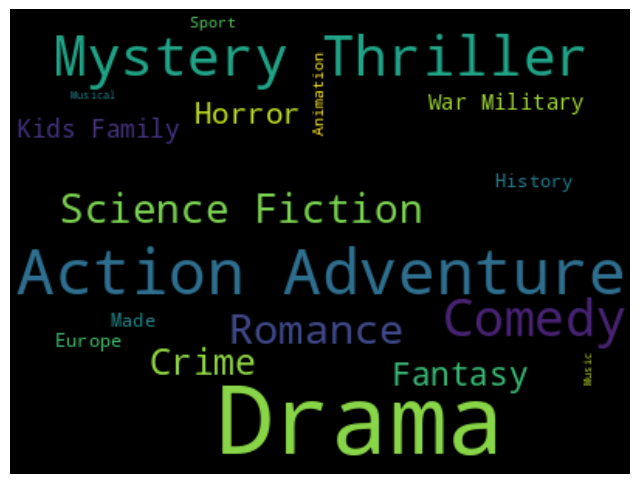

In [122]:
#Let's Visvalize it using word cloud

# Importing Required Libraries:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Choosing Required Data Frame:
data = copy_movies_df['Movies Genre']
movies_df_wordcloud = pd.DataFrame(data)

# joining all text values from the 'Movies Genre' column
text = ' '.join(movies_df_wordcloud['Movies Genre'])

# Creating word cloud object
wordcloud = WordCloud(width=400, height=300, background_color='black').generate(text)

# Ploting the word cloud
plt.figure(figsize=(8, 10))
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis('off')  # Turn off the axis
plt.show()


#####FOR TV SHOW'S DF

In [123]:
# Calculating Mode to get the TOP Genre of TV Shows:

copy_tv_show_genre_mode = copy_tv_show_df['TV Show Genre'].mode().iloc[0]
print(f"Top Genre among TV shows is: {copy_tv_show_genre_mode}")


Top Genre among TV shows is: Drama


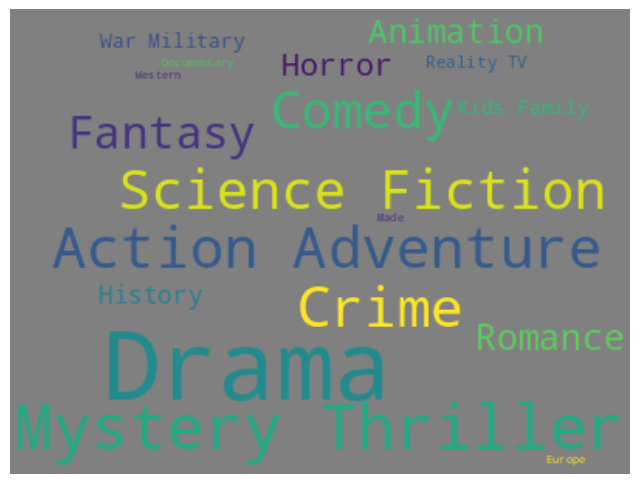

In [124]:
#Let's Visvalize it using word cloud

# Importing Required Libraries:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Choosing Required Data Frame:
data = copy_tv_show_df['TV Show Genre']
tv_show_df_wordcloud = pd.DataFrame(data)

# joining all text values from the 'Movies Genre' column
text = ' '.join(tv_show_df_wordcloud['TV Show Genre'])

# Creating word cloud object
wordcloud = WordCloud(width=400, height=300, background_color='grey').generate(text)

# Ploting the word cloud
plt.figure(figsize=(8, 10))
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis('off')  # Turn off the axis
plt.show()


## **Finding Predominant Streaming Service**

#####For Movies

In [125]:
# To find the PreDominant Streaming Service, Again calculating the mode of all Movies Streaming Platforms:

copy_movies_streaming_mode = (copy_movies_df['Movies Streaming Platforms'].mode().iloc[0])
print(f"Top Streaming Platform for Movies is: {copy_movies_streaming_mode}")

Top Streaming Platform for Movies is: Amazon Video , Amazon Prime Video


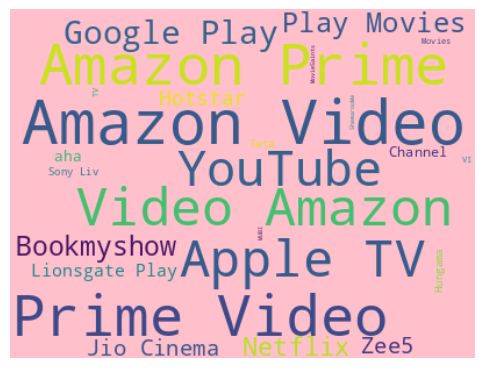

In [126]:
# Importing Required Libraries:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Choosing Required Data Frame:
data = copy_movies_df['Movies Streaming Platforms']
movies_streaming_platform_df = pd.DataFrame(data)

# joining all text values from the 'Movies Genre' column
text = ' '.join(movies_streaming_platform_df['Movies Streaming Platforms'])

# Creating word cloud object
wordcloud = WordCloud(width=400, height=300, background_color='pink').generate(text)

# Ploting the word cloud
plt.figure(figsize=(6, 7))
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis('off')  # Turn off the axis
plt.show()


#####For TV Shows

In [127]:
# To find the PreDominant Streaming Service, Again calculating the mode of all TV Show Streaming Platforms:

copy_tv_show_streaming_mode = (copy_tv_show_df['TV Show Streaming Platforms'].mode().iloc[0])
print(f"Top Streaming Platform for Movies is: {copy_tv_show_streaming_mode}")

Top Streaming Platform for Movies is: Netflix


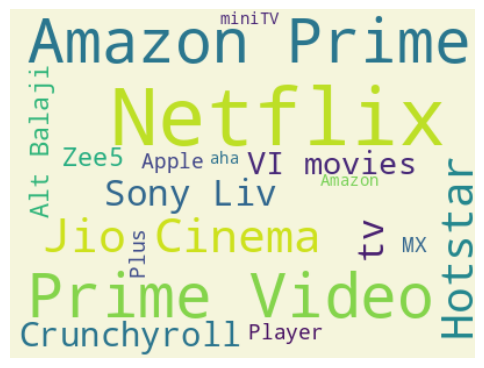

In [128]:
# Importing Required Libraries:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Choosing Required Data Frame:
data = copy_tv_show_df['TV Show Streaming Platforms']
tv_show_streaming_platform_df = pd.DataFrame(data)

# joining all text values from the 'Movies Genre' column
text = ' '.join(tv_show_streaming_platform_df['TV Show Streaming Platforms'])

# Creating word cloud object
wordcloud = WordCloud(width=400, height=300, background_color='beige').generate(text)

# Ploting the word cloud
plt.figure(figsize=(6, 7))
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis('off')  # Turn off the axis
plt.show()


## **Task 3 :- Data Export**

In [130]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [131]:
#Saving final movie dataframe as Final Data in csv format
movies_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Final Movies Data.csv', index=False)

In [132]:
#Saving final TV Show dataframe as Final Data in csv format
tv_show_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Final TV Show Data.csv', index=False)


In [133]:
#saving filter Movie data as Filter Data in csv format
copy_movies_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Filter Movies Data.csv', index=False)

In [134]:
#Saving filter TV Show data as Filter Data in csv format
copy_tv_show_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Filter TV Show Data.csv', index=False)

# **Dataset Drive Link (View Access with Anyone) -**

# ***Congratulations!!! You have completed your Assignment.***